In [13]:
print("Loading...")

# common libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join

# CV and Image
import cv2
from PIL import Image

# pickle
import pickle

# keras
import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
K.image_data_format()

print("Done")

Loading...
Done


In [14]:
p = "dataset/"

print("These are the folders we'll be working with :")

for f in os.listdir(p):
    print(f)

These are the folders we'll be working with :
.directory
0
1
2
3
4
5
6
7
8
9
add
dec
div
eq
mul
sub
x
y
z


In [15]:
def load_images(folder):
    
    train_data=[]
    
    for filename in os.listdir(folder):
        
        if filename != ".directory" :

            image = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
            image = ~image

            if image is not None:

                ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
                contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
                contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

                a = int(28)
                b = int(28)
                maxi = 0

                for c in contour:

                    x,y,a,b=cv2.boundingRect(c)
                    maxi=max(a*b,maxi)

                    if maxi==a*b:

                        x_max=x
                        y_max=y
                        w_max=a
                        h_max=b

                im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
                im_resize = cv2.resize(im_crop,(28,28))
                im_resize = np.reshape(im_resize,(784,1))
                train_data.append(im_resize)
            
    return train_data

In [16]:
data = []

data = load_images(p+"0")
for i in range(0, len(data)):
    data[i] = np.append(data[i], ['0'])
print(len(data))

595


In [17]:
iter = 0

for i in list(os.listdir(p)) :
    
    if i not in ["0", ".directory"] :
    
        print("Iter :", iter)
        print("Working with the", i, "folder")

        data_i = load_images(p+i)

        if i in [str(k) for k in range(1, 10)] :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], [i])

        if i == "add" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["10"])

        if i == "sub" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["11"])


        if i == "mul" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["12"])

        if i == "div" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["13"])

        if i == "eq" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["14"])                

        if i == "dec" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["15"])

        if i == "x" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["16"])

        if i == "y" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["17"]) 


        if i == "z" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["18"]) 


        data = np.concatenate((data, data_i))
        print(len(data))

        print()

        iter += 1

Iter : 0
Working with the 1 folder
1157

Iter : 1
Working with the 2 folder
1590

Iter : 2
Working with the 3 folder
2131

Iter : 3
Working with the 4 folder
2657

Iter : 4
Working with the 5 folder
3090

Iter : 5
Working with the 6 folder
3671

Iter : 6
Working with the 7 folder
4204

Iter : 7
Working with the 8 folder
4758

Iter : 8
Working with the 9 folder
5304

Iter : 9
Working with the add folder
6516

Iter : 10
Working with the dec folder
7140

Iter : 11
Working with the div folder
7758

Iter : 12
Working with the eq folder
8392

Iter : 13
Working with the mul folder
8969

Iter : 14
Working with the sub folder
9624

Iter : 15
Working with the x folder
10076

Iter : 16
Working with the y folder
10475

Iter : 17
Working with the z folder
10687



In [18]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

data = pd.read_csv('train_handwritten.csv',index_col=False)
labels = data[['784']]

data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,168,255,255,...,0,0,0,0,0,0,0,0,0,0
1,0,0,209,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,122,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,65,255,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,110,137,...,0,0,0,0,0,0,0,0,0,0


In [19]:
np.random.seed(1212)
labels=np.array(labels)
cat=to_categorical(labels,num_classes=19)
cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [20]:
temp=data.to_numpy()
X_train = temp.reshape(temp.shape[0], 28, 28, 1)
X_train.shape

(10687, 28, 28, 1)

In [21]:
l=[]
for i in range(X_train.shape[0]):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

np.random.seed(7)

In [18]:
#model

In [22]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(19, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 15)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

In [24]:
plot_model(model, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
checkpoint = ModelCheckpoint("eq_solver.h5", monitor='accuracy', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
nn = model.fit(X_train, cat, epochs=1000, batch_size=256, shuffle=True, verbose=1, callbacks=[checkpoint]).history

Epoch 1/1000
42/42 [==============================] - ETA: 0s - loss: 8.5898 - accuracy: 0.1173
Epoch 1: accuracy improved from -inf to 0.11734, saving model to eq_solver.h5
42/42 [==============================] - 5s 101ms/step - loss: 8.5898 - accuracy: 0.1173
Epoch 2/1000
 1/42 [..............................] - ETA: 4s - loss: 2.6414 - accuracy: 0.1836

C:\Users\pahadian\AppData\Local\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - ETA: 0s - loss: 2.4247 - accuracy: 0.2716
Epoch 2: accuracy improved from 0.11734 to 0.27164, saving model to eq_solver.h5
42/42 [==============================] - 4s 96ms/step - loss: 2.4247 - accuracy: 0.2716
Epoch 3/1000
42/42 [==============================] - ETA: 0s - loss: 1.5475 - accuracy: 0.5320
Epoch 3: accuracy improved from 0.27164 to 0.53205, saving model to eq_solver.h5
42/42 [==============================] - 4s 93ms/step - loss: 1.5475 - accuracy: 0.5320
Epoch 4/1000
42/42 [==============================] - ETA: 0s - loss: 0.9825 - accuracy: 0.6950
Epoch 4: accuracy improved from 0.53205 to 0.69496, saving model to eq_solver.h5
42/42 [==============================] - 4s 96ms/step - loss: 0.9825 - accuracy: 0.6950
Epoch 5/1000
42/42 [==============================] - ETA: 0s - loss: 0.7419 - accuracy: 0.7620
Epoch 5: accuracy improved from 0.69496 to 0.76195, saving model to eq_solver.h5
42/42 [==============================] - 

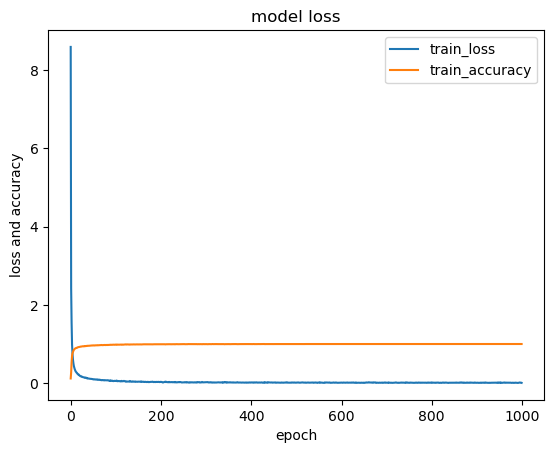

In [26]:
plt.plot(nn['loss'])
plt.plot(nn['accuracy'])
plt.title('model loss')
plt.ylabel('loss and accuracy')
plt.xlabel('epoch')
plt.legend(['train_loss', 'train_accuracy'], loc='upper right')

In [27]:
model = load_model("eq_solver.h5")

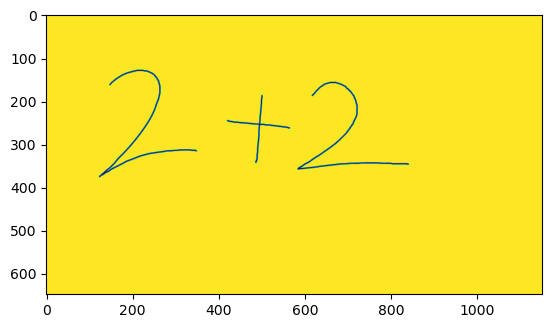

In [28]:
img = cv2.imread('./22.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

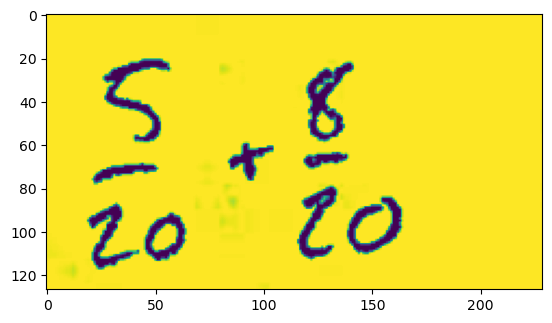

In [38]:
img = cv2.imread('./eq.PNG',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [39]:
if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

9
4
[[20, 88, 20, 29], [22, 69, 29, 9], [27, 22, 30, 37], [85, 60, 20, 17], [121, 23, 21, 35], [139, 85, 25, 25]]


In [40]:
equation=''

for i in range(len(train_data)):
    
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
        
    for j in range(10) :
        if result[0] == j :
            equation = equation + str(j)
    
    if result[0] == 10 :
        equation = equation + "+"
    if result[0] == 11 :
        equation = equation + "-"
    if result[0] == 12 :
        equation = equation + "*"
    if result[0] == 13 :
        equation = equation + "/"
    if result[0] == 14 :
        equation = equation + "="
    if result[0] == 15 :
        equation = equation + "."
    if result[0] == 16 :
        equation = equation + "x"
    if result[0] == 17 :
        equation = equation + "y"      
    if result[0] == 18 :
        equation = equation + "z"
    
print("Your Equation :", equation)

1/1 [==============================] - 0s 31ms/step
Your Equation : x=5.10


In [30]:
#Arithmetic solver

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
import cv2
from PIL import Image, ImageFilter, ImageEnhance
from cv2 import boundingRect

# Function for extracting symbols from an image featuring a white background and black colored symbols
def extract_symbols(image_file, verbose = False):
    # Load image and invert colors
    img_gray = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    img_gray = np.asarray(img_gray)
    img_gray = (255 - img_gray)
    orig_img = img_gray.copy() # clone for extracting symbols later

    # Create dilated image to capture potential loose points (such as dots in division symbol)
    kernel = np.ones((10,1))
    img_gray = cv2.dilate(img_gray,kernel,iterations = 5)
    
    #find contours
    contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    b_boxes = []
    for c in range(len(contours)):

        # Only take contours of symbols without parents to avoid duplicate outlines
        if (hierarchy[0][c][3] == -1):
            brect = boundingRect(contours[c])
            b_boxes.append(brect)
            cv2.rectangle(img_gray, brect, (255,255,255), 2)

    # Sort bounding boxes after appearance in x-direction
    b_boxes = sorted(b_boxes)

    if verbose:
        print("Original image:")
        plt.figure(figsize=(10,10))
        plt.imshow((255 - orig_img), cmap='gray')
        plt.show()
        print("All bounding boxes of all symbols:")
        plt.figure(figsize=(10,10))
        plt.imshow((255 - img_gray), cmap='gray')
        plt.show()
        print("Extracted symbols:")
    
    # b_boxes are formatted as [x_pos, y_pos, width, height]
    #print(b_boxes)

    # Get all symbols as separate images
    symbols = []
    for box in b_boxes:
        x,y,w,h = box
        
        # To ensure that all points in division sign is included:
        # expand bounding box in y-direction if a symbol is wider
        # than it is tall
        
        #if w > h:
        #    h = w
        #    y -= int(h/2)
        
        symbol_img = orig_img[y : y + h, x : x + w]
        symbols.append(symbol_img)
        
    if verbose:
        plt.figure(figsize=(15,5))
        for x in range(len(b_boxes)):
            plt.subplot(1,len(b_boxes), x+1)
            plt.imshow((255 - symbols[x]), cmap='gray')
        plt.show()
        
    return symbols

In [3]:
# Function for reformatting extracted symbol images to match the MNIST data
def format_image(img_arr, verbose = False, blur_strength = 1, norm = True):
    #
    # === PADDING ===
    # to ensure that the symbols appear in the middle of the image
    # with a slight margin similar to the MNIST digits
    #
    symbol_image = Image.fromarray(img_arr)
    
    if symbol_image.width > symbol_image.height:
        x_padding = int(symbol_image.width / 8)
        y_padding = symbol_image.width + x_padding - symbol_image.height

    else:
        y_padding = int(symbol_image.height / 8)
        x_padding = symbol_image.height + y_padding - symbol_image.width
    
    x_offset = int(x_padding / 2)
    y_offset = int(y_padding / 2)
    
    padded_img = Image.new(symbol_image.mode, (symbol_image.width + x_padding, symbol_image.height + y_padding), 0)
    padded_img.paste(symbol_image, (x_offset, y_offset))
    
    #
    # === PRE-PROCESSING ===
    #
    
    # Gaussian blur to ensure that thin symbols still appear after downsizing
    padded_img = padded_img.filter(ImageFilter.GaussianBlur(radius = blur_strength))
    
    # Contrast to increase visibility of symbols after blurring
    padded_img = ImageEnhance.Contrast(padded_img).enhance(blur_strength)
    
    # Downsize symbols to 28x28 embedding
    padded_img = np.asarray(padded_img.resize((28,28)))
    
    # Normalize embedding from values between 0 and 255 to values between 0 and 1
    if norm:
        padded_img = padded_img / 255
    
    # Return embedding as single 28x28 float tensor
    return torch.as_tensor(padded_img).float()

# Function for taking a 28x28 tensor embedding and predicting the symbol it contains
def predict_image(img_arr):
    prediction = predict_symbol(img_arr.reshape(1, 784))
    return prediction

C:\Users\pahadian\AppData\Local\Temp\ipykernel_6808\3844256768.py:42: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:178.)
  return torch.as_tensor(padded_img).float()


dataset/add/ symbols: torch.Size([1212, 28, 28])
dataset/sub/ symbols: torch.Size([655, 28, 28])
dataset/mul/ symbols: torch.Size([577, 28, 28])
dataset/div/ symbols: torch.Size([618, 28, 28])


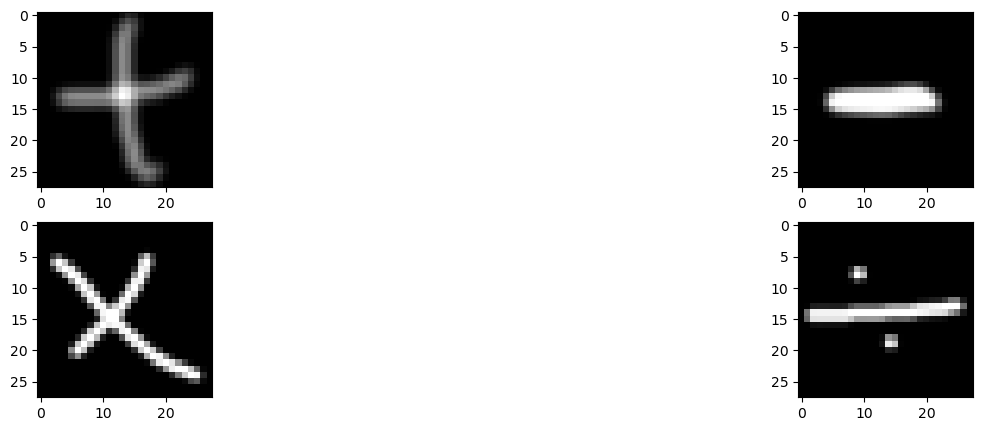

In [4]:
import os

# Define paths to math symbols
path_to_math_add = "dataset/add/"
path_to_math_sub = "dataset/sub/"
path_to_math_mul = "dataset/mul/"
path_to_math_div = "dataset/div/"

def format_dataset_path(path):
    for (root,dirs,files) in os.walk(path):
        formatted_syms = torch.empty(len(files),28,28)
        for sym in range(len(files)):
            symbol = extract_symbols(path + files[sym])
            formatted_symbol = format_image(symbol[0], blur_strength = 2, norm = False)
            formatted_syms[sym] = formatted_symbol
    print(path, "symbols:", formatted_syms.shape)
    
    return formatted_syms.byte()

# Reformat each symbol set to match MNIST dataset

formatted_adds = format_dataset_path(path_to_math_add)
formatted_subs = format_dataset_path(path_to_math_sub)
formatted_muls = format_dataset_path(path_to_math_mul)
formatted_divs = format_dataset_path(path_to_math_div)

new_form_syms = torch.cat((formatted_adds, formatted_subs, formatted_muls, formatted_divs), 0)
new_form_labels = torch.cat((torch.ones(len(formatted_adds)) * 10,
                           torch.ones(len(formatted_subs)) * 11,
                           torch.ones(len(formatted_muls)) * 12,
                           torch.ones(len(formatted_divs)) * 13), 0)

plt.figure(figsize=(18,5))

#print(formatted_adds[0])
plt.subplot(2,2,1)
plt.imshow(formatted_adds[0], cmap="gray")

#print(formatted_subs[0])
plt.subplot(2,2,2)
plt.imshow(formatted_subs[0], cmap="gray")

#print(formatted_muls[0])
plt.subplot(2,2,3)
plt.imshow(formatted_muls[0], cmap="gray")

#print(formatted_divs[0])
plt.subplot(2,2,4)
plt.imshow(formatted_divs[0], cmap="gray")

plt.show()

In [ ]:
#Responsible for recognizing mathematical symbols, trained on MNIST dataset along with handwritten math symbols from Sagyam Thapa's kaggle dataset https://www.kaggle.com/sagyamthapa/handwritten-math-symbols

In [5]:
# Symbol recognition model definitions

transform = transforms.Compose(([transforms.ToTensor()]))

trainset = datasets.MNIST('./', download=True, train=True, transform=transform)
valset = datasets.MNIST('./', download=True, train=False, transform=transform)

#print(trainset.train_data[0])

trainset.data = torch.cat((trainset.data, new_form_syms))
trainset.targets = torch.cat((trainset.targets, new_form_labels.long()))

print(trainset.data.shape)
print(trainset.targets.shape)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

input_size = 784
hidden_sizes = [128, 64]
output_size = 14

sym_recog_model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(sym_recog_model)

torch.Size([63062, 28, 28])
torch.Size([63062])
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=14, bias=True)
  (5): LogSoftmax(dim=1)
)



Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pahadian\AppData\Local\anaconda3

  added / updated specs:
    - pytorch==1.12.1
    - torchaudio==0.12.1
    - torchvision==0.13.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.7.22          |  py310haa95532_0         154 KB
    cudatoolkit-11.3.1         |       h59b6b97_2       545.3 MB
    openssl-1.1.1w             |       h2bbff1b_0         5.5 MB
    pytorch-1.12.1             |py3.10_cuda11.3_cudnn8_0        1.20 GB  pytorch
    pytorch-mutex-1.0          |             cuda           3 KB  pytorch
    torchaudio-0.12.1          |      py310_cu113         3.7 MB  pytorch




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0







cudatoolkit-11.3.1   | 545.3 MB  | ##7        |  28% 

pytorch-1.12.1       | 1.20 GB   | 8          |   8% 






cudatoolkit-11.3.1   | 545.3 MB  | ##7        |  28% 

pytorch-1.12.1       | 1.20 GB   | 8          |   8% 






cudatoolkit-11.3.1   | 545.3 MB  | ##8        |  28% 

pytorch-1.12.1       | 1.20 GB   | 8          |   8% 






cudatoolkit-11.3.1   | 545.3 MB  | ##8        |  28% 

pytorch-1.12.1       | 1.20 GB   | 8          |   8% 






cudatoolkit-11.3.1   | 545.3 MB  | ##8        |  28% 

pytorch-1.12.1       | 1.20 GB   | 8          |   9% 






cudatoolkit-11.3.1   | 545.3 MB  | ##8        |  29% 

pytorch-1.12.1       | 1.20 GB   | 8          |   9% 






cudatoolkit-11.3.1   | 545.3 MB  | ##8        |  29% 






cudatoolkit-11.3.1   | 545.3 MB  | ##8        |  29% 

pytorch-1.12.1       | 1.20 GB   | 8          |   9% 

pytorch-1.12.1       | 1.20 GB   | 8          |   9% 

pytorch-1.12.1       | 1.20 GB   | 8          |   9% 






cudatoolkit-11.3.1   |

In [7]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = sym_recog_model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

loss.backward()

In [8]:
# ANN Training

optimizer = optim.SGD(sym_recog_model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = sym_recog_model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e+1, running_loss/len(trainloader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 1 - Training loss: 1.064754771533409

Training Time (in minutes) = 0.10856857299804687
Epoch 2 - Training loss: 0.41980877589683746

Training Time (in minutes) = 0.21256349086761475
Epoch 3 - Training loss: 0.34051057814977476

Training Time (in minutes) = 0.3473502556482951
Epoch 4 - Training loss: 0.2900700738944461

Training Time (in minutes) = 0.5027806560198466
Epoch 5 - Training loss: 0.25073399742721425

Training Time (in minutes) = 0.6341174006462097
Epoch 6 - Training loss: 0.21730493573173426

Training Time (in minutes) = 0.7676251610120137
Epoch 7 - Training loss: 0.19161503037728717

Training Time (in minutes) = 0.9023956735928853
Epoch 8 - Training loss: 0.17093090766296545

Training Time (in minutes) = 1.0228271762530008
Epoch 9 - Training loss: 0.15296644705742538

Training Time (in minutes) = 1.1468016227086386
Epoch 10 - Training loss: 0.1376224057692241

Training Time (in minutes) = 1.2646796425183615
Epoch 11 - Training loss: 0.12435075149419916

Training Time 

Predicted Digit = 1


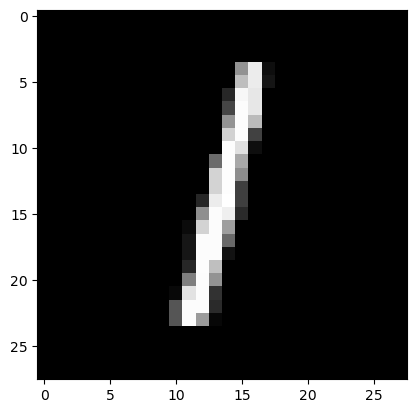

In [9]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)

def predict_symbol(img):
    with torch.no_grad():
        logps = sym_recog_model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    return probab.index(max(probab))

# Check prediction
print("Predicted Digit =", predict_symbol(img))
plt.imshow(img.reshape(28,28), cmap = 'gray')
plt.show()